In [16]:
import sys
sys.path.append("tools")
from slowfast.config.defaults import assert_and_infer_cfg
from slowfast.utils.misc import launch_job
from slowfast.utils.parser import load_config

# These are the model function imports
from demo_net import demo
from test_net import test
from train_net import train
from visualization import visualize

import cv2, os, json
import numpy as np, pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:

# 1. Provide path to config file
# path_to_config = "../slowfast_config_ava_daycare_combined.yaml" 
# path_to_config = "../slowfast_config_daycare_2.yaml"
path_to_config = "configs/AVA/c2/SLOWFAST_32x2_R101_50_50_v2.1.yaml"

# 2. Dummy args to emulate the parsed command line arguments
class Args:
    def __init__(self):
        self.cfg_files = [path_to_config]
        self.init_method = "tcp://localhost:9999"  # or "env://" depending on your setup
        self.opts = None
        self.output_dir = "outputs_pretrained"  # example
        self.num_shards = 1
        self.shard_id = 0
args = Args()

# 3. Load config
cfg = load_config(args, path_to_config)
cfg = assert_and_infer_cfg(cfg)

cfg.TRAIN.ENABLE # make sure training is enabled

path_to_config : configs/AVA/c2/SLOWFAST_32x2_R101_50_50_v2.1.yaml


False

In [3]:
if cfg.TRAIN.ENABLE:
    launch_job(cfg=cfg, init_method=args.init_method, func=train)

[06/19 22:55:34][INFO] train_net.py:  518: Train with config:
[06/19 22:55:34][INFO] train_net.py:  519: {'AUG': {'AA_TYPE': 'rand-m9-mstd0.5-inc1',
         'COLOR_JITTER': 0.4,
         'ENABLE': False,
         'GEN_MASK_LOADER': False,
         'INTERPOLATION': 'bicubic',
         'MASK_FRAMES': False,
         'MASK_RATIO': 0.0,
         'MASK_TUBE': False,
         'MASK_WINDOW_SIZE': [8, 7, 7],
         'MAX_MASK_PATCHES_PER_BLOCK': None,
         'NUM_SAMPLE': 1,
         'RE_COUNT': 1,
         'RE_MODE': 'pixel',
         'RE_PROB': 0.25,
         'RE_SPLIT': False},
 'AVA': {'ANNOTATION_DIR': '../data/daycare_fall/Secaucus_data/annotations',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.8,
         'EXCLUSION_FILE': 'excluded.csv',
         'FRAME_DIR': '../data/daycare_fall/Secaucus_data/merge_frames/',
         'FRAME_LIST_DIR': '../data/daycare_fall/Secaucus_data/annotations',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'val_labels.csv',

In [1]:
!rm -r outputs

In [ ]:
if cfg.TRAIN.ENABLE:
    launch_job(cfg=cfg, init_method=args.init_method, func=train)

[06/18 16:00:00][INFO] train_net.py:  518: Train with config:
[06/18 16:00:00][INFO] train_net.py:  519: {'AUG': {'AA_TYPE': 'rand-m9-mstd0.5-inc1',
         'COLOR_JITTER': 0.4,
         'ENABLE': False,
         'GEN_MASK_LOADER': False,
         'INTERPOLATION': 'bicubic',
         'MASK_FRAMES': False,
         'MASK_RATIO': 0.0,
         'MASK_TUBE': False,
         'MASK_WINDOW_SIZE': [8, 7, 7],
         'MAX_MASK_PATCHES_PER_BLOCK': None,
         'NUM_SAMPLE': 1,
         'RE_COUNT': 1,
         'RE_MODE': 'pixel',
         'RE_PROB': 0.25,
         'RE_SPLIT': False},
 'AVA': {'ANNOTATION_DIR': '../data/combined/annotations',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.8,
         'EXCLUSION_FILE': 'excluded.csv',
         'FRAME_DIR': '../data/combined/frames/',
         'FRAME_LIST_DIR': '../data/combined/annotations',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'combined_val_labels.csv',
         'IMG_PROC_BACKEND': 'cv2',
         'LABE

In [ ]:

AVA:
  BGR: False
  DETECTION_SCORE_THRESH: 0.8

  # ✅ YOUR CUSTOM DATA
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  TRAIN_LISTS: ['train_frames.csv']
  TRAIN_GT_BOX_LISTS: ['train_labels.csv']
  TRAIN_PREDICT_BOX_LISTS: []
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels.csv']
  GROUNDTRUTH_FILE: val_labels.csv
  LABEL_MAP_FILE: action_labels.pbtxt
  EXCLUSION_FILE: excluded.csv

In [10]:
cfg.AVA.ANNOTATION_DIR = "../data/daycare_fall/Secaucus_data/annotations"
cfg.AVA.FRAME_DIR = "../data/daycare_fall/Secaucus_data/merge_frames/"
cfg.AVA.FRAME_LIST_DIR = "../data/daycare_fall/Secaucus_data/annotations"
cfg.AVA.TEST_LISTS = ['eval_frames.csv']
cfg.AVA.TEST_PREDICT_BOX_LISTS = ['val_labels_ava_mapped.csv']
cfg.AVA.GROUNDTRUTH_FILE = "val_labels_ava_mapped.csv"
cfg.AVA.EXCLUSION_FILE = "excluded.csv"
cfg.AVA.LABEL_MAP_FILE = "ava_action_list_v2.2_for_activitynet_2019.pbtxt"

In [7]:
cfg.AVA

CfgNode({'FRAME_DIR': '../data/daycare_fall/Secaucus_data/merge_frames/', 'FRAME_LIST_DIR': '../data/daycare_fall/Secaucus_data/annotations', 'ANNOTATION_DIR': '../data/daycare_fall/Secaucus_data/annotations', 'TRAIN_LISTS': ['train.csv'], 'TEST_LISTS': ['eval_frames.csv'], 'TRAIN_GT_BOX_LISTS': ['ava_train_v2.1.csv'], 'TRAIN_PREDICT_BOX_LISTS': [], 'TEST_PREDICT_BOX_LISTS': ['val_labels_ava_mapped.csv'], 'DETECTION_SCORE_THRESH': 0.8, 'BGR': False, 'TRAIN_USE_COLOR_AUGMENTATION': False, 'TRAIN_PCA_JITTER_ONLY': True, 'TEST_FORCE_FLIP': False, 'FULL_TEST_ON_VAL': False, 'LABEL_MAP_FILE': 'ava_action_list_v2.2_for_activitynet_2019.pbtxt', 'EXCLUSION_FILE': 'ava_val_excluded_timestamps_v2.1.csv', 'GROUNDTRUTH_FILE': 'val_labels_ava_mapped.csv', 'IMG_PROC_BACKEND': 'cv2'})

In [12]:
cfg.NUM_GPUS = 1
cfg.TEST.BATCH_SIZE = 1
cfg.DATA_LOADER.NUM_WORKERS = 0
cfg.DETECTION.ENABLE = True
cfg.TEST.NUM_TEMPORAL_CLIPS = [cfg.TEST.NUM_ENSEMBLE_VIEWS]
cfg.TEST.CHECKPOINT_FILE_PATH = "SLOWFAST_32x2_R101_50_50.pkl"
results = test(cfg)[0]

[06/20 04:09:16][INFO] test_net.py:  179: Test with config:
[06/20 04:09:16][INFO] test_net.py:  180: AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  RE_PROB: 0.25
  RE_SPLIT: False
AVA:
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  BGR: False
  DETECTION_SCORE_THRESH: 0.8
  EXCLUSION_FILE: excluded.csv
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: val_labels_ava_mapped.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: ava_action_list_v2.2_for_activitynet_2019.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels_ava_mapped.csv']
  TRAIN_GT_BOX_LISTS: [

In [13]:
results

{'PascalBoxes_Precision/mAP@0.5IOU': 0.43513242321443873,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/bend/bow (at the waist)': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/crouch/kneel': 0.03940886699507389,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/dance': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall down': 0.16162733529990167,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/get up': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/jump/leap': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/lie/sleep': 0.6346046950890448,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/martial art': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/run/jog': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sit': 0.4830233133217917,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/stand': 0.8569979053663819,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/swim': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/walk': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/answer pho

In [5]:
!ls outputs_only_daycare/checkpoints

checkpoint_epoch_00001.pyth  checkpoint_epoch_00026.pyth
checkpoint_epoch_00002.pyth  checkpoint_epoch_00027.pyth
checkpoint_epoch_00003.pyth  checkpoint_epoch_00028.pyth
checkpoint_epoch_00004.pyth  checkpoint_epoch_00029.pyth
checkpoint_epoch_00005.pyth  checkpoint_epoch_00030.pyth
checkpoint_epoch_00006.pyth  checkpoint_epoch_00031.pyth
checkpoint_epoch_00007.pyth  checkpoint_epoch_00032.pyth
checkpoint_epoch_00008.pyth  checkpoint_epoch_00033.pyth
checkpoint_epoch_00009.pyth  checkpoint_epoch_00034.pyth
checkpoint_epoch_00010.pyth  checkpoint_epoch_00035.pyth
checkpoint_epoch_00011.pyth  checkpoint_epoch_00036.pyth
checkpoint_epoch_00012.pyth  checkpoint_epoch_00037.pyth
checkpoint_epoch_00013.pyth  checkpoint_epoch_00038.pyth
checkpoint_epoch_00014.pyth  checkpoint_epoch_00039.pyth
checkpoint_epoch_00015.pyth  checkpoint_epoch_00040.pyth
checkpoint_epoch_00016.pyth  checkpoint_epoch_00041.pyth
checkpoint_epoch_00017.pyth  checkpoint_epoch_00042.pyth
checkpoint_epoch_00018.pyth  ch

In [ ]:
cfg.NUM_GPUS = 1
cfg.DETECTION.ENABLE = True
cfg.TEST.NUM_TEMPORAL_CLIPS = [cfg.TEST.NUM_ENSEMBLE_VIEWS]

all_epoch_results_daycare = {}
for epoch in range(1, 51):
    cfg.TEST.CHECKPOINT_FILE_PATH = f"outputs_only_daycare/checkpoints/checkpoint_epoch_{str(epoch).zfill(5)}.pyth"
    results = test(cfg)[0]
    all_epoch_results_daycare[epoch] = results

[06/20 01:23:32][INFO] test_net.py:  179: Test with config:
[06/20 01:23:32][INFO] test_net.py:  180: AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  RE_PROB: 0.25
  RE_SPLIT: False
AVA:
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  BGR: False
  DETECTION_SCORE_THRESH: 0.8
  EXCLUSION_FILE: excluded.csv
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: val_labels.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: action_labels.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels.csv']
  TRAIN_GT_BOX_LISTS: ['train_labels.csv']
  TRAIN_LISTS: ['train_frames.

In [ ]:
import json
with open("only_daycare_training_results_per_epoch.json", "w") as f:
    f.writelines(json.dumps(all_epoch_results_daycare, indent=4))

In [ ]:
cfg.NUM_GPUS = 1
cfg.DETECTION.ENABLE = True
cfg.TEST.NUM_TEMPORAL_CLIPS = [cfg.TEST.NUM_ENSEMBLE_VIEWS]

all_epoch_results_daycare_ava = {}
for epoch in range(1, 51):
    cfg.TEST.CHECKPOINT_FILE_PATH = f"outputs/checkpoints/checkpoint_epoch_{str(epoch).zfill(5)}.pyth"
    results = test(cfg)[0]
    all_epoch_results_daycare_ava[epoch] = results

[06/20 02:13:15][INFO] test_net.py:  179: Test with config:
[06/20 02:13:15][INFO] test_net.py:  180: AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  RE_PROB: 0.25
  RE_SPLIT: False
AVA:
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  BGR: False
  DETECTION_SCORE_THRESH: 0.8
  EXCLUSION_FILE: excluded.csv
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: val_labels.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: action_labels.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels.csv']
  TRAIN_GT_BOX_LISTS: ['train_labels.csv']
  TRAIN_LISTS: ['train_frames.

In [20]:
all_epoch_results_daycare_ava

{1: {'PascalBoxes_Precision/mAP@0.5IOU': 0.3013326983085874,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall': 0.08742135377233035,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/standing': 0.49004214963119075,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sitting': 0.5046722259844727,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/walking': nan,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/crawling': 0.09970773381294964,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sleeping': 0.3248200283419934,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/eating': nan,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/jumping': nan,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/others': nan},
 2: {'PascalBoxes_Precision/mAP@0.5IOU': 0.30550698380464125,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall': 0.10193695346419616,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/standing': 0.4892237442922375,
  'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sitting': 0.4931090649071802,
  'PascalBox

In [21]:
import json
with open("ava_daycare_training_results_per_epoch.json", "w") as f:
    f.writelines(json.dumps(all_epoch_results_daycare_ava, indent=4))

In [19]:
only_daycare_training_results_per_epoch = json.loads(open("only_daycare_training_results_per_epoch.json").read())
ava_daycare_training_results_per_epoch = json.loads(open("ava_daycare_training_results_per_epoch.json").read())

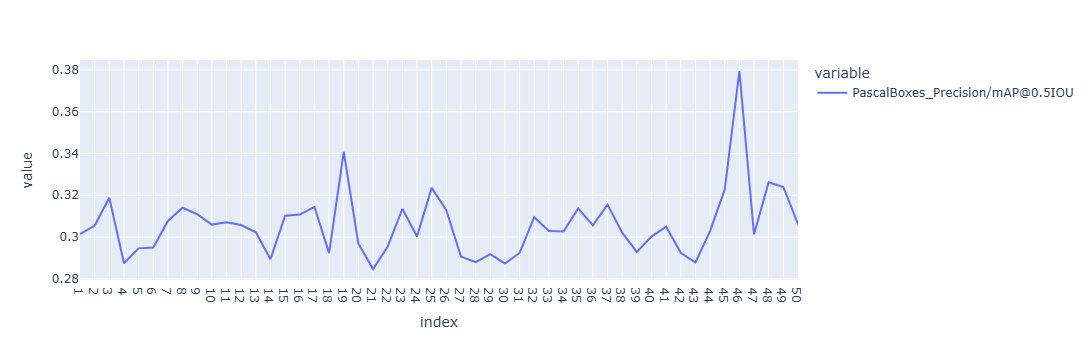

In [24]:
px.line(pd.DataFrame(ava_daycare_training_results_per_epoch).T["PascalBoxes_Precision/mAP@0.5IOU"])

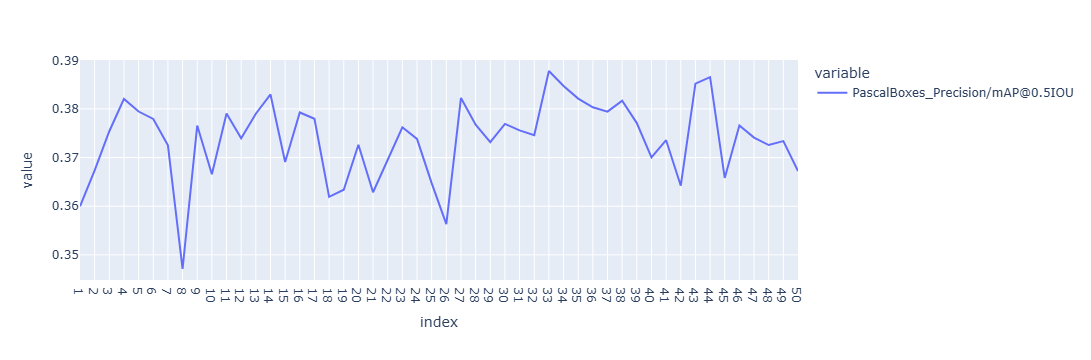

In [25]:
px.line(pd.DataFrame(only_daycare_training_results_per_epoch).T["PascalBoxes_Precision/mAP@0.5IOU"])

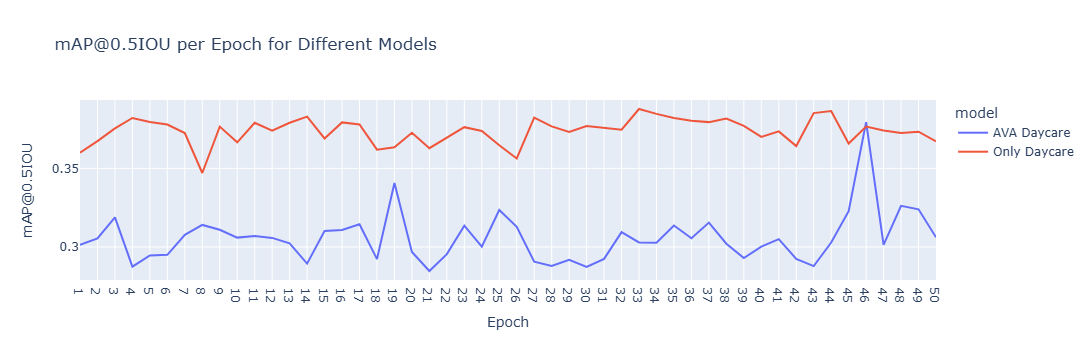

In [26]:
# Extract the relevant data
ava_daycare_map = pd.DataFrame(ava_daycare_training_results_per_epoch).T["PascalBoxes_Precision/mAP@0.5IOU"]
only_daycare_map = pd.DataFrame(only_daycare_training_results_per_epoch).T["PascalBoxes_Precision/mAP@0.5IOU"]

# Create DataFrames for plotting
df_ava = pd.DataFrame({'epoch': ava_daycare_map.index, 'mAP@0.5IOU': ava_daycare_map.values, 'model': 'AVA Daycare'})
df_only = pd.DataFrame({'epoch': only_daycare_map.index, 'mAP@0.5IOU': only_daycare_map.values, 'model': 'Only Daycare'})

# Combine the DataFrames
df_combined = pd.concat([df_ava, df_only])

# Create the multi-line chart using Plotly Express
fig = px.line(df_combined,
              x='epoch',
              y='mAP@0.5IOU',
              color='model',
              title='mAP@0.5IOU per Epoch for Different Models',
              labels={'epoch': 'Epoch', 'mAP@0.5IOU': 'mAP@0.5IOU'})
fig.show()

| Metric             | Only Daycare | Daycare + Ava | Pretrained Model |
|--------------------|--------------|---------------|------------------|
| mAP@0.5IOU         | 0.387802     | 0.379458      | 0.435132         |
|--------------------|--------------|---------------|------------------|
| AP@0.5IOU/fall     | 0.066298     | 0.085238      | 0.161627         |
| AP@0.5IOU/standing | 0.712321     | 0.494658      | 0.856998         |
| AP@0.5IOU/sitting  | 0.449428     | 0.499080      | 0.483023         |
| AP@0.5IOU/walking  | N/A          | N/A           | N/A              |
| AP@0.5IOU/crawling | 0.067769     | 0.462065      | 0.039409         |
| AP@0.5IOU/sleeping | 0.643195     | 0.356250      | 0.634605         |
| AP@0.5IOU/eating   | N/A          | N/A           | N/A              |
| AP@0.5IOU/jumping  | N/A          | N/A           | N/A              |
| AP@0.5IOU/others   | N/A          | N/A           | N/A              |

In [29]:
ava_daycare_map.argmax(), only_daycare_map.argmax()

(45, 32)

In [35]:
ava_daycare_training_results_per_epoch[str(ava_daycare_map.argmax()+1)]

{'PascalBoxes_Precision/mAP@0.5IOU': 0.37945809915793005,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall': 0.08523814154505359,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/standing': 0.4946575342465754,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sitting': 0.49907998584005886,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/walking': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/crawling': 0.4620651609553479,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sleeping': 0.35624967320261436,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/eating': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/jumping': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/others': nan}

In [36]:
only_daycare_training_results_per_epoch[str(only_daycare_map.argmax()+1)]

{'PascalBoxes_Precision/mAP@0.5IOU': 0.3878020792297999,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall': 0.06629834254143646,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/standing': 0.7123205296729376,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sitting': 0.44942758864844984,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/walking': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/crawling': 0.06776932084309134,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sleeping': 0.6431946144430845,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/eating': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/jumping': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/others': nan}

In [3]:
cfg.TEST.CHECKPOINT_FILE_PATH = "outputs_only_daycare/checkpoints/checkpoint_epoch_00030.pyth"
cfg.NUM_GPUS = 1
cfg.DETECTION.ENABLE = True
cfg.TEST.NUM_TEMPORAL_CLIPS = [cfg.TEST.NUM_ENSEMBLE_VIEWS]

In [7]:
launch_job(cfg=cfg, init_method=args.init_method, func=test)

[06/19 23:56:15][INFO] test_net.py:  179: Test with config:
[06/19 23:56:15][INFO] test_net.py:  180: AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  RE_PROB: 0.25
  RE_SPLIT: False
AVA:
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  BGR: False
  DETECTION_SCORE_THRESH: 0.8
  EXCLUSION_FILE: excluded.csv
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: val_labels.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: action_labels.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels.csv']
  TRAIN_GT_BOX_LISTS: ['train_labels.csv']
  TRAIN_LISTS: ['train_frames.

In [9]:
launch_job(cfg=cfg, init_method=args.init_method, func=test)

[06/20 00:01:08][INFO] test_net.py:  179: Test with config:
[06/20 00:01:08][INFO] test_net.py:  180: AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  RE_PROB: 0.25
  RE_SPLIT: False
AVA:
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  BGR: False
  DETECTION_SCORE_THRESH: 0.8
  EXCLUSION_FILE: excluded.csv
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: val_labels.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: action_labels.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels.csv']
  TRAIN_GT_BOX_LISTS: ['train_labels.csv']
  TRAIN_LISTS: ['train_frames.

In [5]:
results = test(cfg)[0]

[06/20 00:37:33][INFO] test_net.py:  179: Test with config:
[06/20 00:37:33][INFO] test_net.py:  180: AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  RE_PROB: 0.25
  RE_SPLIT: False
AVA:
  ANNOTATION_DIR: ../data/daycare_fall/Secaucus_data/annotations
  BGR: False
  DETECTION_SCORE_THRESH: 0.8
  EXCLUSION_FILE: excluded.csv
  FRAME_DIR: ../data/daycare_fall/Secaucus_data/merge_frames/
  FRAME_LIST_DIR: ../data/daycare_fall/Secaucus_data/annotations
  FULL_TEST_ON_VAL: False
  GROUNDTRUTH_FILE: val_labels.csv
  IMG_PROC_BACKEND: cv2
  LABEL_MAP_FILE: action_labels.pbtxt
  TEST_FORCE_FLIP: False
  TEST_LISTS: ['eval_frames.csv']
  TEST_PREDICT_BOX_LISTS: ['val_labels.csv']
  TRAIN_GT_BOX_LISTS: ['train_labels.csv']
  TRAIN_LISTS: ['train_frames.

In [6]:
results

{'PascalBoxes_Precision/mAP@0.5IOU': 0.37692318730681834,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall': 0.06657559198542805,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/standing': 0.6330395815623587,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sitting': 0.4297681621857789,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/walking': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/crawling': 0.10247126436781609,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sleeping': 0.6527613364327101,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/eating': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/jumping': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/others': nan}

In [3]:
from slowfast.datasets import (
    ava_helper as ava_helper,
    cv2_transform as cv2_transform,
    transform as transform,
    utils as utils,
)

In [4]:
_image_paths, _video_idx_to_name = ava_helper.load_image_lists(cfg, is_train=False)

In [5]:
boxes_and_labels = ava_helper.load_boxes_and_labels(cfg, mode="val")

ann_filenames : ['../data/combined/annotations/combined_val_labels.csv']
ann_is_gt_box : [False]
detect_thresh : 0.8
boxes_sample_rate : 4
n_rows : 21008
count : 5222
n_det_thresh_filtered : 0
n_sample_rate_filtered : 15786


In [ ]:
boxes_and_labels

In [6]:
len(_image_paths)

9

In [7]:
len(boxes_and_labels)

21

In [11]:
len(boxes_and_labels) == len(_image_paths)

True